# Primena QR faktorizacije

Sadržaj:

- [Rešavanje sistema linearnih jednačina](#Rešavanje-sistema-linearnih-jednačina)
- [Najmanji kvadrati](#Najmanji-kvadrati)
- [Regresija](#Regresija)

In [1]:
import numpy as np
from timeit import default_timer as timer
import numpy.random as rndm
import scipy.linalg as spl
import matplotlib as mplb
import matplotlib.pyplot as plt

## Rešavanje sistema linearnih jednačina

Jedna od mogućih primena QR faktorizacije jeste rešavanje sistema linearnih jednačina kada je matrica sistema regularna. Ukoliko je poznata QR faktorizacija regularne matrice $A\in\mathcal{M}_{n\times n}$
$$A=QR,\quad Q,R\in\mathcal{M}_{n\times n},$$
matrica $Q$ je ortogonalna, a $R$ je regularna gornje trougaona matrica.
Tada se kvadratni sistem jednačina $Ax=b$ matričnim množenjem pretvara u trougaoni.
$$Ax=b\quad\Longleftrightarrow\quad QRx=b\quad\Longleftrightarrow\quad Rx=Q^Tb.$$

Operacijski je ovo zahtevniji proces od postupka rešavanja sistema LU dekompozicijom. Ipak, rezultati dobijeni QR dekompozicijom su numerički stabilniji, tj. manje osteljivi na greške ulaznih podataka.

**Primer 1** Uporedićemo vremena rešavanja $100$ sistema linearnih jednačina $Ax=b_k,\ k=\overline{1,100}$ sa i bez trougaone faktorizacije, inverznom matricom, i upotrebom QR faktorizacije. Za proveru kvaliteta dobijenog rešenja potražićemo normu rezidualnog vektora $r=Ax-b$ i vektora greške $err=x-resenje.$

In [3]:
n=2234
I=np.eye(n)
A = rndm.randn(n,n)-5*I
resenje=10/np.arange(1,n+1)   #resenje je x=[10 10/2 10/3... 10/n]
b = A@resenje  

In [4]:
start = timer()
lu, piv = spl.lu_factor(A)
for k in range(1,101):
    x = spl.lu_solve((lu, piv), b*k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec") 

Vreme izracunavanja:  0.4545098999999908 sec


In [5]:
start = timer()
for k in range(1,101):
    x = spl.solve(A, b*k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  21.712625099999997 sec


In [6]:
start = timer()
A1=spl.inv(A)
for k in range(1,101):
    x = A1@b*k
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.5170418999999811 sec


In [7]:
start = timer()
Q, R=spl.qr(A)
for k in range(1,101):
    x = spl.solve_triangular(R,Q.T@b*k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  1.584578300000004 sec


In [8]:
start = timer()
Q, R=spl.qr(A)
b1=Q.T@b
for k in range(1,101):
    x = spl.solve_triangular(R,b1*k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  1.2824590999999828 sec


In [9]:
xLU = spl.lu_solve((lu, piv), b)
xQR=spl.solve_triangular(R,b1)
xInv=A1@b
x=spl.solve(A, b)

In [11]:
resQR=spl.norm(A@xQR-b)
resQR

9.120389098914447e-13

In [12]:
resLU=spl.norm(A@xLU-b)
resLU

2.5409675043720445e-12

In [13]:
res=spl.norm(A@x-b)
res

2.5409675043720445e-12

In [14]:
resInv=spl.norm(A@xInv-b)
resInv

3.821333768465972e-10

In [15]:
gresQR=spl.norm(xQR-resenje)
gresQR

2.645181474559563e-12

In [16]:
gresLU=spl.norm(xLU-resenje)
gresLU

7.688220534259693e-12

In [17]:
gres=spl.norm(x-resenje)
gres

7.688220534259693e-12

In [18]:
gresInv=spl.norm(xInv-resenje)
gresInv

1.0213061300470083e-11

## Najmanji kvadrati

Klasičan problem najmanjih kvadrata, koji su definisali i rešili Gaus i Ležandr oko 1800 godine, predstavlja jedan od sjajnih primera primene svojstava ortogonalnosti. Metod se koristi za određivanje približnog rešenja nesaglasnog sistema linearnih jednačina $$Ax = b,$$ gde su $A\in\mathcal{M}_{m\times n}$ matrica sistema punog ranga kolona, $x\in\mathbb{R}^n$ vektor nepoznatih i $b\in\mathbb{R}^m$ vektor slobodnih članova.  U slučaju kada je ${\rm rang}(A)=n<m$ manji od ${\rm rang}([A|b])=n+1\leq m$ sistem $Ax = b$ nema rešenja. U takvoj situaciji upotrebljava se metod najmanjih kvadrata   za pronalaženje približnog rešenja $\hat{x}$ koje će minimizirati odstupanje 
$\|b-Ax\|^2,$ tj. 
$$\min_{x\in\mathbb{R}^m}\|b-Ax\|^2=\|b-A\hat{x}\|^2.$$

<div class="alert alert-block alert-success">
<b>Problem najmanjih kvadrata :</b> 
    
Za matricu $A\in\mathcal{M}_{m\times n}$ i vektor $b\in\mathbb{R}^m$ rešenje problema najmanjih kvadrata jednačine $Ax=b$ predstavlja vektor $\widehat{x}\in\mathbb{R}^n$ za koji je rezidualni vektor najmanji
$$\|r\|=\|b-A\widehat{x}\|\leq\|b-Ax\|,\qquad\forall x\in\mathbb{R}^n.$$    
</div>

<div>
   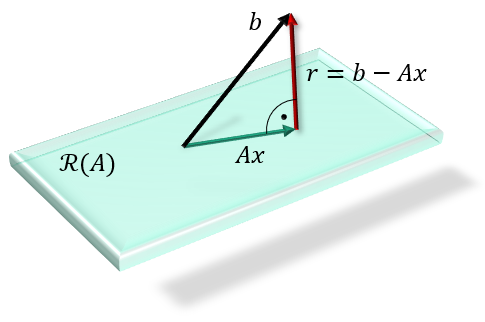  
</div>

Poznato je da će rezidualni vektor $r=b-Ax$ biti najmanji kada je ortogonalan na prostor kolona matrice $A,$ tj. kada je $Ax$ ortogonalna projekcija vektora $b$ na $\mathcal{R}(A).$ 

Uslov ove ortogonalnosti $r\perp\mathcal{R}(A)$ možemo najlakše da opišemo jednakošću 
$$A^Tr=A^T(b-Ax)=\theta.$$
Tako dolazimo do saglasnog kvadratnog sistema jednačina koji daje rešenje problema najmanjih kvadrata:
$$A^TAx=A^Tb.$$
Ovaj sistem zovemo normalne jednačine sistema $Ax=b.$ Sistem normalne jednačine će imati jedinstveno rešenje ukoliko je Gramova matrica $A^TA$ regularna. To se dešava kada je $A$ matrica punog ranga kolona. U takvoj situaciji rešenje problema najmanjih kvadrata glasi
$$\widehat{x}=(A^TA)^{-1}A^Tb.$$

Ovo rešenje $\hat{x}$ minimizira sumu kvadrata koordinatnih 'grešaka', otud i ime metoda.
$$\min_{x\in\mathbb{R}^n}\|r\|^2=\min_{x\in\mathbb{R}^n}\big(r_1^2+r_2^2+\dots+r_n^2\big).$$ 
Minimalni vektor ostatka $r=b-A\hat{x}$ naziva se optimalni ostatak.

S obzirom da se rešenje problema najmanjih kvadrata dobija uz projekciju vektora $b$ na prostor kolona matrice $A,$ veoma često se kaže da se ovo rešenje dobija regresijom vektora $b$ na kolone matrice $A.$ Tako se metod najmanjih kvadrata još naziva i regresija.

**Primer 2.** Pomoću normalnog sistema jednačina odredićemo rešenje nesaglasnog sistema datog u matričnom obliku $Ax=b,$
$$A=\begin{bmatrix}4&0\\0&2\\1&1\end{bmatrix},\qquad b=\begin{bmatrix}2\\0\\11\end{bmatrix}.$$
Odredimo najpre matrice iz normalne jednačine.

In [17]:
A=np.array([[4,0],[0,2],[1,1]])
b=np.array([2,0,11])
M=np.transpose(A)@A
print(M)
c=np.transpose(A)@b
print(c)

[[17  1]
 [ 1  5]]
[19 11]


Sada rešavamo sistem jednačina $Mx=c,$ za $M=\begin{bmatrix}17&1\\1&5\end{bmatrix},\quad c=\begin{bmatrix}19\\11\end{bmatrix}.$ 

In [18]:
x_hat=spl.solve(M,c)
x_hat

array([1., 2.])

Greška aproksimacije rešenjem problema najmanjih kvadrata može da se odredi izrazom rezidualnog vektora $r=b-A\widehat{x}.$

In [19]:
r=b-A@x_hat
print(r)
print(np.linalg.norm(r))  #norma rezidualnog vektora
print(np.dot(r,r))        #kvadrat norme rezidualnog vektora

[-2. -4.  8.]
9.16515138991168
84.0


Proverimo ortogonalnost vektora $r$ i kolona matrice $A.$

In [20]:
A.T@r

array([0., 0.])

Python poseduje ugrađenu funkciju za određivanje rešenja problema najmanjih kvadrata. Primenićemo je za prethodni problem.

In [21]:
np.linalg.lstsq(A, b, rcond=None)

(array([1., 2.]), array([84.]), 2, array([4.13312987, 2.21748449]))

Izlaz ove naredbe sadrži rešenje problema najmanjih kvadrata, kvadrat norme rezidualnog vektora, rang matrice i singularne vrednosti.

In [22]:
x=np.linalg.lstsq(A, b, rcond=None)[0]
print(x)

[1. 2.]


Slično funkcioniše i naredba u SciPy biblioteci. 

In [23]:
spl.lstsq(A, b)

(array([1., 2.]), 84.00000000000003, 2, array([4.13312987, 2.21748449]))

In [24]:
x= spl.lstsq(A, b)[0]
print(x)

[1. 2.]


Označimo sa $\widehat{b}=P_{\mathcal{R}(A)}b$ ortogonalnu projekciju vektora $b$ na prostor kolona matrice $A.$ Tada je sistem jednačina $$Ax=\widehat{b}$$ saglasan, tj. ima rešenje. Jedinstvenost rešenja zavisi od ranga matrice $A.$ Ukoliko je $A$ punog ranga kolona, sistem $Ax=\widehat{b}$ ima jedinstveno rešenje. U suprotnom sistem će imati beskonačno mnogo rešenja. QR faktorizacija matrice sistema $A$ nam pomaže da odredimo rešenje upravo u prvom slučaju.

Pretpostavimo da je $A\in\mathcal{M}_{m\times n}$ ranga $n.$ Tada redukovana QR faktorizacija matrice $A$ sadrži matricu sa ortonormiranim kolonama $Q\in\mathcal{M}_{m\times n}, \quad Q^TQ=I_n$ i regularnu gornje trouganu matricu $R\in\mathcal{M}_{n\times n}.$
S obzirom da je $\mathcal{R}(A)=\mathcal{R}(Q)$ i $P_{\mathcal{R}(A)}=P_{\mathcal{R}(Q)}=QQ^T,$ to važi da je 
$$\widehat{b}=QQ^Tb.$$ Tako polazni regularan sistem $Ax=\widehat{b}$ postaje
$$QRx=QQ^Tb\quad\Longrightarrow\quad Q^TQRx=Q^TQQ^Tb\quad\Longrightarrow\quad Rx=Q^Tb.$$
Rešenje problema najmanjih kvadrata u ovom slučaju glasi
$$\widehat{x}=R^{-1}Q^Tb.$$

**Primer 3.** Pretpostavimo da je potrebno odrediti visine tri planine $h_1,h_2$ i $h_3.$ Sa jednog lokaliteta izmerene su visine $2474m, 3882m$ i $4834m.$ Mereno sa planine $h_1,$ visina $h_2$ je nadvisuje za $1422m,$ a $h_3$ je $2354m$ viša. Mereno sa $h_2,$ $h_3$ deluje više za $950m.$ Procenićemo visine $h_1,h_2$ i $h_3$ koje su najsaglasnije merenim podacima.

Navedeni podaci mogu se opisati sledećim jednakostima:
\begin{align}
    h_1&=2474,\quad
    h_2=3882,\quad 
    h_3=4834,\\
    h_2-h_1&=1442,\quad h_3-h_1=2354,\quad
    h_3-h_2=950.
\end{align}

Matrični zapis dobijenog nesaglasnog sistema je
$$Ah=b\ \Longleftrightarrow\ \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\\
-1&1&0\\-1&0&1\\0&-1&1\end{bmatrix}
\begin{bmatrix} h_1\\h_2\\h_3\end{bmatrix}
=\begin{bmatrix}2474\\3882\\4834\\1442\\2354\\950\end{bmatrix}.$$

Potražičemo rešenje problema najmanjih kvadrata ovog nesaglasnog sistema.

In [25]:
A=np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b=np.array([2474,3882,4834,1442,2354,950])
resenje=spl.lstsq(A,b)
h=resenje[0]
print("h=",h)
print("||res||=",np.sqrt(resenje[1]))
print("res=",b-A@h)

h= [2467. 3891. 4832.]
||res||= 25.69046515733067
res= [  7.  -9.   2.  18. -11.   9.]


Rešenje preko normalne jednačine:

In [26]:
spl.solve(A.T@A,A.T@b)

array([2467., 3891., 4832.])

Rešenje preko QR faktorizacije:

In [27]:
Q,R=spl.qr(A, mode='economic')
spl.solve_triangular(R,Q.T@b)

array([2467., 3891., 4832.])

**Zadatak 1.** Naći rešenje problema najmanjih kvadrata $Ax=b$ gde su
$$A=\begin{bmatrix}2&1&2\\4&5&0\\7&0&0\\1&2&-3\\-1&1&3\end{bmatrix},\quad x=\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix},\quad b=\begin{bmatrix}0\\1\\2\\-1\\3\end{bmatrix}.$$

**Rešenje :** 

Potražimo redukovanu QR faktorizaciju matrice $A.$

In [28]:
A=np.array([[2,1,2],[4,5,0],[7,0,0],[1,2,-3],[-1,1,3]])
[Q,R]=np.linalg.qr(A,mode='reduced')
print(np.round(Q,2))
print(np.round(R,2))

[[-0.24 -0.07  0.44]
 [-0.47 -0.76  0.04]
 [-0.83  0.47  0.03]
 [-0.12 -0.35 -0.63]
 [ 0.12 -0.27  0.64]]
[[-8.43 -2.73  0.24]
 [ 0.   -4.85  0.07]
 [ 0.    0.    4.68]]


Rešenje problema najmanjih kvadrata $\widehat{x}$ je tada jedinstveno rešenje saglasnog sistema $Rx=Q^Tb.$
$$Rx=Q^Tb\ \Longleftrightarrow\ 
\begin{bmatrix}8.43&2.73&-0.24\\0&4.85&-0.07\\0&0&4.68\end{bmatrix}
\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix}=
\begin{bmatrix} 1.66\\0.30\\2.65\end{bmatrix}\ \Longrightarrow\quad
\widehat{x}=\begin{bmatrix} 0.19\\0.07\\0.57\end{bmatrix}.$$

In [29]:
b=np.array([0,1,2,-1,3])
x=np.linalg.solve(R,np.transpose(Q)@b)
print(np.round(x,2))

[0.19 0.07 0.57]


Za realizaciju metoda najmanjih kvadrata dovoljno je poznavanje redukovane QR faktorizacije matrice $A.$ Neka je $A=QR$ puna faktorizacija sa matricama $Q$ i $R$ 
u blok formi
$$Q=\begin{bmatrix} Q_{m\times n}&Q_{m\times(m-n)}\end{bmatrix},\qquad
R=\begin{bmatrix} R_{n\times n}\\O_{(m-n)\times n}\end{bmatrix},
$$
gde su $Q_{m\times(m-n)}$ tihe kolone matrice $Q.$ Tada je $A=Q_{m\times n}R_{n\times n}$ redukovana $QR$ faktorizacija matrice $A$ i važi da je
$$Q^Tb=\left[\begin{array}{c} Q_{m\times n}^T\\[4pt] Q_{m\times(m-n)}^T\end{array}\right] b
=\left[\begin{array}{c} Q_{m\times n}^Tb\\[4pt] Q_{m\times(m-n)}^Tb\end{array}\right]
=\left[\begin{array}{c} y_{n\times1}\\[4pt] y_{(m-n)\times1}\end{array}\right].$$
Rešenje problema najmanjih kvadrata $\hat{x}$ je tada jedinstveno rešenje sistema $$R_{n\times n}x=Q_{m\times n}^Tb.$$ 

Primetimo da tihe kolone $Q_{m\times(m-n)}$ $QR$ faktorizacije matrice $A$ definišu optimalni rezidualni vektor rešenja najmanjih kvadrata, 
\begin{align}
r&=b-A\hat{x}
=b-\begin{bmatrix} Q_{n\times m}&Q_{n\times(n-m)}\end{bmatrix}
\begin{bmatrix} R_{m\times m}\\O_{(n-m)\times m}\end{bmatrix}R_{m\times m}^{-1}Q_{n\times m}^Tb\\
&=b-\begin{bmatrix} Q_{n\times m}&Q_{n\times(n-m)}\end{bmatrix}
\begin{bmatrix} Q_{n\times m}^Tb\\O_{(n-m)\times m}\end{bmatrix}\\
&=b-Q_{n\times m}Q_{n\times m}^Tb=\big(I_n-Q_{n\times m}Q_{n\times m}^T\big)b\\
&=Q_{n\times(n-m)}Q_{n\times(n-m)}^Tb=Q_{n\times(n-m)}y_{(m-n)\times1}.
\end{align}

In [30]:
Q,R=spl.qr(A)
print(R)

[[-8.42614977 -2.72959781  0.23735633]
 [ 0.         -4.85276166  0.07255924]
 [ 0.          0.          4.68384427]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [31]:
y=Q.T@b
hqr=spl.solve_triangular(R[:3],y[:3])
Qtihe=Q[:,3:]
print("h=",hqr)
print("res=",Qtihe@y[3:])

h= [0.19023473 0.07066329 0.56596058]
res= [-1.5830539  -0.11425534  0.66835692  0.36632044  1.4216897 ]


Do sada obrađeni problem metoda najmanjih kvadrata ticao se matrica sa punim rangom kolonama. Naredni primer pokazaće šta se dešava kada ovaj uslov nije ispunjen.

**Zadatak 2.** Neka je $A\in\mathcal{M}_{n\times m}$ matrica punog ranga kolona, $b\in\mathbb{R}^n$ vektor i $\hat{x}$ rešenje problema najmanjih kvadrata $Ax=b.$ Dokazati:

a)  Za proizvoljan vektor $x\in\mathbb{R}^n$ važi da je $(Ax)\cdot b=(Ax)\cdot(A\hat{x}).$

b)  Za nenula vektore $A\hat{x}$ i $b$ važi da je $\cos\angle(A\hat{x},b)=\dfrac{\|A\hat{x}\|}{\|b\|}\,.$

c) Rešenje problema najmanjih kvadrata $\hat{x}$ minimizira ugao između vektora $Ax$ i $b.$

**Rešenje :** 

a) Neka je $\hat{x}=(A^TA)^{-1}A^Tb$ rešenje problema najmanjih kvadrata $Ax=b.$  Tada je
\begin{align}
    (Ax)\cdot(A\hat{x})&=(Ax)^T(A(A^TA)^{-1}A^Tb)=x^TA^TA(A^TA)^{-1}A^Tb=x^TA^Tb=(Ax)^Tb\\
    &=(Ax)\cdot b.
\end{align}

b) $\cos\angle(A\hat{x},b)=\dfrac{(A\hat{x})\cdot b}{\|A\hat{x}\|\,\|b\|}
\stackrel{\rm a)}{=}\dfrac{(A\hat{x})\cdot(A\hat{x})}{\|A\hat{x}\|\,\|b\|}
=\dfrac{\|A\hat{x}\|^2}{\|A\hat{x}\|\,\|b\|}=\dfrac{\|A\hat{x}\|}{\|b\|}\,.$

Zaključujemo da je $\cos\angle(A\hat{x},b)\geq0\ \Longrightarrow\ \angle(A\hat{x},b)\in[0,\pi/2].$

c) Za vrednost ugla između dva vektora uzima se vrednost iz opsega $[0,\pi],$ tj. manji od dva moguća ugla i bez usmerenja jer je $\cos$ parna funkcija. Primetimo da je na skupu vrednosti $[0,\pi]$ funkcija $\cos$ monotono opadajuća. 

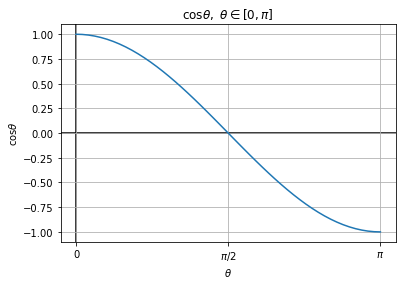

In [40]:
teta=np.linspace(0,np.pi)
kos=np.cos(teta)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\cos\theta$")
plt.title(r"$\cos\theta,\ \theta\in[0,\pi]$")
plt.grid()
plt.plot(teta,kos)
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xticks([0,np.pi/2,np.pi],["0",r"$\pi/2$",r"$\pi$"]);

Tada je
\begin{align}
    \cos\angle(Ax,b)&=\dfrac{(Ax)\cdot b}{\|Ax\|\,\|b\|}
    \stackrel{\rm a)}{=}\dfrac{(Ax)\cdot(A\hat{x})}{\|Ax\|\,\|b\|}
    =\dfrac{(Ax)\cdot(A\hat{x})}{\|Ax\|\,\|A\hat{x}\|}
    \dfrac{\|A\hat{x}\|}{\|b\|}\\
    &\stackrel{\rm b)}{=}\cos\angle(Ax,A\hat{x})\cos\angle(A\hat{x},b)\leq\cos\angle(A\hat{x},b).
\end{align}
$\Longrightarrow\ \angle(Ax,b)\geq\angle(A\hat{x},b).$

**Zadatak 3.** U problemu najmanjih kvadrata $Ax=b$ minimizira se funkcija 
$\|Ax-b\|^2=\displaystyle\sum_{i=1}^n(a_i^Tx-b_i)^2,$ gde su $a_i^T$ vrste matrice $A\in\mathcal{M}_{n\times m}$ i $b=\begin{bmatrix} b_1&\dots&b_n\end{bmatrix}^T.$ Rešenje ovog problema dato je izrazom 
$$
\widehat{x}=(A^TA)^{-1}A^Tb.
$$
U problemu najmanjih kvadrata sa težinama minimizira se funkcija 
$$\|W(Ax-b)\|^2=\|Bx-d\|^2=\displaystyle\sum_{i=1}^nw_i^2(a_i^Tx-b_i)^2,\quad w_i>0$$ 
gde je $W={\rm diag}(w_1,\dots,w_n),$ $B=WA,$ $d=Wb.$ Dati izraz rešenja problema najmanjih kvadrata sa težinama po ugledu na izraz $
\widehat{x}=(A^TA)^{-1}A^Tb.
$

**Rešenje :** 

Klasičan problem najmanjih kvadrata $Ax=b$ sve karakteristike sistema tretira ravnopravno. Ukoliko sa $a_i^T$ označimo vrste matrice $A,$
$$A=\left[\begin{array}{c} \phantom{ww}a_1^T\phantom{ww}\\[3pt] \hline a_2^T\\[4pt]\hline \vdots\\[3pt]\hline a_n^T\end{array}\right],$$ funkcija cilja se može dati u notaciji vrsta sa:
$$\|Ax-b\|^2=\sum_{i=1}^n(a_i^Tx-b_i)^2.$$
Ukoliko želimo da rastojanje do neke karakteristike $b_i$ bude minimizirano više u odnosu na druge karakteristike, na to se može uticati kroz težinski metod najmanjih kvadrata. Promena funkcije cilja u obliku 
$$\|Ax-b\|_w^2=\sum_{i=1}^nw_i^2(a_i^Tx-b_i)^2,\ w_i>0,$$ 
prilikom minimiziranja favorizuje komponenete sa većom težinom $w_i.$ 	

Uvedimo oznaku za dijagonalnu matricu $W={\rm diag}(w_1,w_2,\dots,w_n).$ Tada je $$\|Ax-b\|_w^2=\|W(Ax-b)\|^2.$$ Rešenje problema najmanjih kvadrata sa težinama opisano je formulama $$\hat{x}_w=(A^TW^2A)^{-1}A^TW^2b.$$

Primetimo najpre da je matrice $B=WA$ istog ranga kolona kao $A,$ tj. i ona je punog ranga kolona. Zbog toga se na problem $Bx=d$ može primeniti analogna formula za rešenje.
\begin{align}
    \widehat{x}&=(B^TB)^{-1}B^Td=(A^TW^TWA)^{-1}A^TW^TWb
    =(A^TW^2A)^{-1}A^TW^2b.
\end{align}

**Primer 4.** Pomoću normalnog sistema jednačina odredićemo rešenje nesaglasnog sistema datog u matričnom obliku $Ax=b,$
$$A=\begin{bmatrix}1&1&0&0\\1&1&0&0\\1&0&1&0\\1&0&1&0\\1&0&0&1\\1&0&0&1\end{bmatrix},\qquad b=\begin{bmatrix}-3\\-1\\0\\2\\5\\1\end{bmatrix}.$$
Normalna jednačina ima matrice:

In [32]:
A=np.array([[1,1,0,0],[1,1,0,0],[1,0,1,0],[1,0,1,0],[1,0,0,1],[1,0,0,1]])
b=np.array([-3,-1,0,2,5,1])
M=np.transpose(A)@A
print(M)
c=np.transpose(A)@b
print(c)

[[6 2 2 2]
 [2 2 0 0]
 [2 0 2 0]
 [2 0 0 2]]
[ 4 -4  2  6]


Jasno je da matrica $A$ nije punog ranga kolona pa ni Gramova matrica $M=A^TA$ nije regularna. Zbog toga sistem 
$$Mx=c\quad\Longleftrightarrow\quad
\begin{bmatrix}6&2&2&2\\2&2&0&0\\2&0&2&0\\2&0&0&2\end{bmatrix}
\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}4\\-4\\2\\6\end{bmatrix}$$ ima beskonačno mnogo rešenja. Rešenje ovakvog sistema dobićemo ponovo ugrađenom funkcijom. Postupak dolaženja do rezultata je posledica naredne dekompozicije matrica, SVD i Mur-Penrouzovog inverza.

In [33]:
np.linalg.lstsq(A, b, rcond=None)

(array([ 0.5, -2.5,  0.5,  2.5]),
 array([], dtype=float64),
 3,
 array([2.82842712e+00, 1.41421356e+00, 1.41421356e+00, 2.67184961e-16]))

In [34]:
x=np.linalg.lstsq(A, b, rcond=None)[0]
b-A@x

array([-1.,  1., -1.,  1.,  2., -2.])

Linearna algebra je u tesnoj vezi sa problemima linearne optimizacije, koji se veoma često pojavljuju u mašinskom učenju. Rešavanje sistema linearnih jednačina je veoma specijalan slučaj jednog od fundamentalnih problema mašinskog učenja - linearna regresija. Jedan moguć način rešavanja sistema jednačina $Ax = b$ jeste posmatranje kroz optimizacioni problem u kome želimo
da minimiziramo funkciju cilja (objective function) $\|Ax − b\|^2.$ Ovo predstavlja klasičnu regresiju metodom najmanjih kvadrata. Regresija najmanjim kvadratima pronalazi najbolje približno rešenje sistema linearnih jednačina, a ne tačno rešenje. Minimalna vrednost funkcije cilja je jasno $0,$ koja se dobija kada tačno rešenje sistema $Ax = b$ postoji. Kada to nije slučaj, tj kada je sistem jednačina nesaglasan, optimizacioni problem će dati rešenje koje je sa najmanjim rezidualnim odstupanjem. 

## Regresija

Kompjuterske i druge nauke bave se proučavanjem sistema i procesa na osnovu merenih veličina u svojstvu podataka koji se numerički obrađuju. [Matematički model](https://en.wikipedia.org/wiki/Mathematical_model) je opis nekog sistema, ili procesa, upotrebom matematičkog jezika i koncepata. Sastoji se od promenljivih veličina i relacija izmeđ njih.  Promenljive veličine opisuju neke karakteristike sistema (features) kao što su npr. brojač, signal, odziv ili odgovor, vreme, faza procesa ili neka merena fizička veličina i sl. Sam model zadaje se definisanjem relacija nad praćenim promenljivim veličinama. Relacije se uobičajeno zadaju dijagramima (grafovima) ili opisuju nekom funkcionalnom vezom oblika 
$g(x)=y,\ x\in\mathbb{R}^k,\ y\in\mathbb{R}^s.$ 
$$g(x)=\begin{bmatrix} g_1(x)\\g_2(x)\\ \vdots\\ g_s(x)\end{bmatrix}
=\begin{bmatrix} g_1(x_1,x_2,\dots,x_k)\\g_2(x_1,x_2,\dots,x_k)\\ \vdots\\ g_s(x_1,x_2,\dots,x_k)\end{bmatrix}
=\begin{bmatrix} y_1\\y_2\\ \vdots\\y_s\end{bmatrix}=y.$$

Ovde nas zanimaju relacije iskazane nekom funkcionalnom vezom.
Funkcija $g$ naziva se predikciona funkcija modela ili skraćeno predikcija tj. predviđanje (model feature function). Vektor merenih veličina $x$ u takvom kontekstu se upotrebljava da opiše uslove pod kojima se traže vrednosti komponenti vektora $y.$ Dakle neke teško merljive ili nemerljive karakteristike sistema pokušavaju da se opišu i predvide njihove vrednosti radi posrednog upravljanja ishodom modela ili predviđanjem načina ponašanja modela pod nekim novim uslovima. Funkcije $g_i(x),\ i=1,2,\dots,s,$ nazivaju se komponentne ili koordinatne funkcije i služe za opis praćene veličine $y_i.$ Na taj način zadaje se eksplicitni matematički model kome je $x$ skup ulaznih veličina, a $y$ izlaz modeliranog sistema ili fenomena.

Fundamentalan problem u inženjerstvu i nauci uopšte, jeste uspostavljanje matematičkog modela, tj. određivanje funkcionalne zavisnosti $g(x)=y,\ g:\mathbb{R}^k\to\mathbb{R}^s.$ Ovaj proces naziva se matematičko modeliranje.
Kako se problem modeliranja svodi na određivanje koordinatnih funkcija $g_i(x),$ u nastavku ćemo posmatrati isključivo slučaj $s=1,$ kada je $g(x)=y\in\mathbb{R},$ gde je $g$ realna funkcija više realnih promenljivih, tj. $g:\mathbb{R}^k\to\mathbb{R}.$ U procesu modeliranja najpre je potrebno odrediti vrstu funkcije $g,$ tj. oblik funkcionalne zavisnosti posmatranih karakteristika sistema ili fenomena: da li je periodičan ili ne, da li je linearan, kvadratni ili uopšte stepeni; da li je eksponencijalan, logaritamski, trigonometrijski i sl. Zatim je potrebno podesiti parametre funkcionalne zavisnosti tako da model daje što bolje predviđanje vrednosti izlaza $y$ pod uslovima ulaza $x.$ Tako celokupan model $g$ opisujemo nekim baznim funkcijama koje se uz parametrizaciju kombinuju u složeniji izraz,
$$g(x)=g\big(x;\underbrace{\varphi_1(x),\ \dots,\ \varphi_m(x)}_{\mbox{bazne funkcije modela}};\underbrace{\lambda_1,\ \dots,\ \lambda_s}_{\mbox{parametrizacija}}\big).$$

Linearna algebra primenjuje se kod matematičkih modela sa linearnom parametarskom zavisnošću. To su modeli oblika
$$g(x)=\lambda_1\varphi_1(x)+\lambda_2\varphi_2(x)+\dots+\lambda_m\varphi_m(x),$$
gde se funkcijama $\varphi_i$ izra\v zava funkcionalna zavisnost, a parametrima $\lambda_i$ ona 'preciznije podešava'. Funkcije $\varphi_i$ se nazivaju bazisne funkcije ili preslikavanja karakteristika sistema (feature mappings) i služe za grubu skicu zakonitosti $g.$ Baznim funkcijama se opisuju pretpostavke o mogućim relacijama između  praćenih karakteristika sistema - ulaza i izlazne veličine. Matematički model  je uspostavljen  kada su poznate bazisne funkcije i parametri modela. Poželjno je testirati dobijeni model na nekom skupu podataka. 
  Za kvalifikaciju greške modela osim uobičajenih normi mogu se koristiti i statističke karakteristike vektora.  

Tip funkcije $g$ (njen eksplicitni oblik) određuje tip modela. Tako govorimo o algebarskom modelu kada je $g$ algebarski polinom, o eksponencijalnom modelu kada je $g$ eksponencijalna funkcija, o trigonometrijskom modelu, itd. Naravno, funkcija $g$ može da predstavlja i kombinaciju različitih tipova elementarnih funkcija. 

Nakon izbora baznih funkcija matematički model se 'štimuje' izborom vrednosti parametara $\lambda_i.$ 
 U te svrhe koriste se eksperimenti za merenje praćenih veličina sistema. Merenja se nazivaju podaci modela i zadaju se u obliku skupa merenja ili  obzervacija $S=\{(a_i,b_i),\ a_i\in\mathbb{R}^k,\ b_i\in\mathbb{R},\ i=1,2,\dots,n\}.$ Parametri $\lambda_i$ određuju se iz uslova bliskosti $g(a_i)\approx b_i,\ i=1,2,\dots,n.$ U zavisnosti od toga kako definišemo bliskost modela obzervacijama razlikujemo probleme interpolacije i aproksimacije.  

Interpolacija podrazumeva da predikciona funkcija zadovoljava uslove $g(a_i)= b_i$ za sve $i=1,2,\dots,n.$ Svaki drugi vid bliskosti predikcione funkcije podacima predstavlja problem aproksimacije.  Rezultujuća funkcija modela svojim grafikom ne mora da prolazi kroz tačke skupa podataka.

<div>
   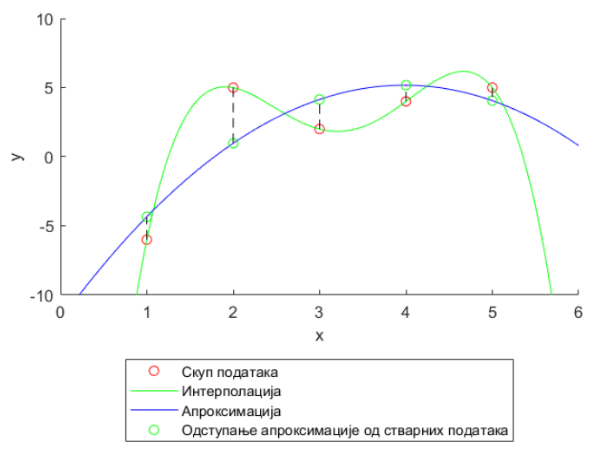  
</div>

Tip modela prilagođava se geometriji podataka skupa $S.$   Model svojom geometrijom treba da što verodostojnije oponaša osobine skupa $S.$
Matematičke modele  upoznaćemo za početak kroz algebarske modele i to kao funkcije jedne realne promenljive. Interpolacija algebarskim polinomima je već ranije obrađena. Sada se bavimo aproksimacijom kada je mera bliskosti Euklidova norma na skupu uzoraka. Odgovarajuće rešenje naziva se regersija. Kada je funkcija modela linearna funkcija, odgovarajuče rešenje nazivamo linearna regeresija.

**Primer 1.** 	Pretpostavimo da želimo da odredimo koeficijente linearne funkcije $$y=kx+p$$ koja opisuje vezu između dve veličine $x\in\mathbb{R}$ i $y\in\mathbb{R}.$  Za njihovo određivanje koristimo $n$ parova vrednosti
	$$(a_1, b_1), (a_2, b_2), \dots , (a_n, b_n).$$ 
Cilj je odrediti $k$ i $p$ takve da je $b_i \approx ka_i+p,\ i=1,2,\dots,n,$ videti sliku. 

In [35]:
x=rndm.uniform(0,30,150)
y=3.5*x+rndm.normal(5,10,150)
p=np.polyfit(x,y,1)   #naredba za aproksimaciju polinomom zadatog stepena
t=np.array([0,30])
pt=np.polyval(p,t)

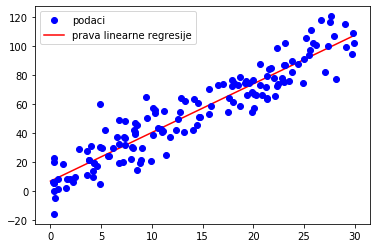

In [36]:
plt.plot(x,y,'ob', label="podaci", zorder=1)
plt.plot(t,pt,'-r', label="prava linearne regresije", zorder=-1)
plt.legend(loc='upper left');

Možemo da proverimo opravadanost izbora linearnog modela proverom modela za polinome većeg stepena.

In [37]:
p2=np.polyfit(x,y,2)   
p3=np.polyfit(x,y,3)
p4=np.polyfit(x,y,4)
p20=np.polyfit(x,y,20)
tx=np.linspace(0,30)
pt2=np.polyval(p2,tx)
pt3=np.polyval(p3,tx)
pt4=np.polyval(p4,tx)
pt20=np.polyval(p20,tx)

C:\Users\jovan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


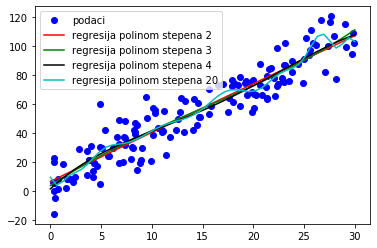

In [38]:
plt.plot(x,y,'ob', label="podaci", zorder=-1)
plt.plot(tx,pt2,'-r', label="regresija polinom stepena 2", zorder=1)
plt.plot(tx,pt3,'-g', label="regresija polinom stepena 3", zorder=1)
plt.plot(tx,pt4,'-k', label="regresija polinom stepena 4", zorder=1)
plt.plot(tx,pt20,'-c', label="regresija polinom stepena 20", zorder=1)
plt.legend(loc='upper left');

Kod problema linearne regeresije izraze za koeficijente regresione prave možemo da dobijemo u zatvorenom obliku. Sistem jednačina linearne regresije $A\Lambda=b$  ima matrice
	$$A=\begin{bmatrix} a_1&1\\ a_2&1\\ \vdots&\vdots\\ a_n&1\end{bmatrix},\
	\Lambda=\begin{bmatrix} k\\ p\end{bmatrix},\ b=\begin{bmatrix} b_1\\b_2\\ \vdots\\ b_n\end{bmatrix}.$$
Označimo sa $\mathbb{1}=\begin{bmatrix}1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n$ vektor od svih jedinica, i sa 
$a=\begin{bmatrix} a_1&a_2&\dots&a_n\end{bmatrix}^T.$ Primetimo da je $\mathbb{1}^T\mathbb{1}=n.$ Matrice u normalnim jednačinama tada glase
$$\begin{array}{l}A^TA=\begin{bmatrix} a_1&a_2&\dots&a_n\\1&1&\dots&1\end{bmatrix}
\begin{bmatrix} a_1&1\\ a_2&1\\ \vdots&\vdots\\ a_n&1\end{bmatrix}=
\begin{bmatrix} \|a\|^2&a^T\mathbb{1}\\[5pt] \mathbb{1}^Ta&\mathbb{1}^T\mathbb{1}\end{bmatrix}
=\begin{bmatrix} \|a\|^2&\mathbb{1}^Ta\\[5pt] \mathbb{1}^Ta&n\end{bmatrix},\\
A^Tb=\begin{bmatrix} a_1&a_2&\dots&a_n\\1&1&\dots&1\end{bmatrix}
\begin{bmatrix} b_1\\b_2\\ \vdots\\ b_n\end{bmatrix}=	\begin{bmatrix} a^Tb\\[5pt] \mathbb{1}^Tb\end{bmatrix}.
	\end{array}$$
Dakle, normalne jednačine su 
	$\begin{bmatrix} \|a\|^2&\mathbb{1}^Ta\\[5pt] 	\mathbb{1}^Ta&n\end{bmatrix}
	\begin{bmatrix} k\\ p\end{bmatrix}=\begin{bmatrix} a^Tb\\[5pt] \mathbb{1}^Tb\end{bmatrix}
	.$  

Rešenje sistema možemo potražiti, npr. na osnovu jednakosti .
$$ (A^TA)^{-1}=\dfrac{1}{n\|a\|^2-(\mathbb{1}^Ta)^2}\begin{bmatrix} n&-\mathbb{1}^Ta\\[5pt] -\mathbb{1}^Ta&\|a\|^2\end{bmatrix}.$$
Koeficijenti $k$ i $p$ tada  glase
\begin{align} 
\begin{bmatrix} \widehat{k}\\ \widehat{p}\end{bmatrix}&=(A^TA)^{-1}A^Tb=\dfrac{1}{n\|a\|^2-(\mathbb{1}^Ta)^2}
\begin{bmatrix} na^Tb-\mathbb{1}^Ta\mathbb{1}^Tb\\[5pt] \|a\|^2\mathbb{1}^Tb-\mathbb{1}^Taa^Tb \end{bmatrix}.
\end{align}
Dobijena linearna funkcija $f(x)=\widehat{k}x+\widehat{p}$ predstavlja predikcionu funkciju i koristi se za predviđanje vrednosti veličine $y$ na osnovu ulaza $x.$ 

Za svaki ulazni podatak $a_i$ označimo sa $y_i$ izlaz (predikciju) dobijene funkcije regersije, tj. $y_i=\widehat{k}a_i+\widehat{p}.$ Tada vektor 
$$y=\begin{bmatrix} y_1\\y_2\\\vdots\\y_n\end{bmatrix}=A\begin{bmatrix} \widehat{k}\\ \widehat{p}\end{bmatrix}
=A\widehat{x},$$ 
predstavlja predviđanje linearnog modela za ulaze $a_i.$ Odstupanje dobijenih predviđanja $y_i$ od merenih vrednosti $b_i$  izražavamo rezidualnim vektorom $r=b-y=b-A\widehat{x},$ $\widehat{x}=\begin{bmatrix} \widehat{k}&\widehat{p}\end{bmatrix}^T$ koji pokazuje po koordinatama odstupanje rezultata modela od merenih vrednosti za svaki od ulaza.
  $$r=\begin{bmatrix} r_1\\r_2\\ \vdots\\ r_n\end{bmatrix}=\begin{bmatrix} b_1-y_1\\ b_2-y_2\\ \vdots\\ b_n-y_n\end{bmatrix}.$$ 
 Odavde je jasno da regresiona prava jeste prava koja minimizira zbir kvadrata vertikalnih odstojanja tačaka podataka od te prave, videti sliku.

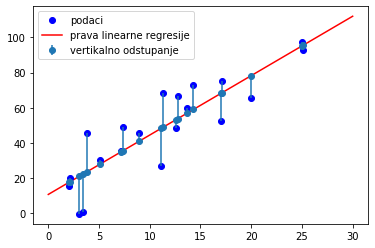

In [39]:
x=rndm.uniform(0,30,20)
y=3.5*x+rndm.normal(5,10,20)
p=np.polyfit(x,y,1)   #naredba za aproksimaciju polinomom zadatog stepena
t=np.array([0,30])
pt=np.polyval(p,t)
px=np.polyval(p,x)
err=np.array([px-y,y-px])
err[0][err[0]>0]=0
err[1][err[1]>0]=0
plt.plot(x,y,'ob', label="podaci", zorder=1)
plt.plot(t,pt,'-r', label="prava linearne regresije", zorder=-1)
plt.errorbar(x,px,yerr=err,fmt ='o', label="vertikalno odstupanje")
plt.legend(loc='upper left');

**Zadatak 4.** Izraziti koeficijente $k$ i $p$ linearne regresije $y=kx+p$ za skup podataka 
$$(x,y)\in\{(a_i,b_i)\ |\ i=1,2,\dots,n\},$$ koristeći $\mu,\sigma$ i $\rho.$

**Rešenje :** 

Označimo vektore 
$$a=\begin{bmatrix} a_1&a_2&\dots&a_n\end{bmatrix}^T,\qquad b=\begin{bmatrix} b_1&b_2&\dots&b_n\end{bmatrix}^T\qquad
\mbox{i}\qquad \mathbb{1}=\begin{bmatrix} 1&1&\dots&1\end{bmatrix}^T.$$   
Podsetimo se oznaka:
- srednje-kvadratna norma: $\|v\|_{sr}=\sqrt{\dfrac{x_1^2+x_2^2+\dots+x_n^2}{n}}
  	=\dfrac{\|v\|}{\sqrt{n}}=\sqrt{\dfrac{v^Tv}{n}}
  	=\sqrt{\dfrac{v^Tv}{\mathbb{1}^T\mathbb{1}}}\,,$
- srednja vrednost: $\mu(v)=\dfrac{x_1+x_2+\dots+x_n}{n}=\dfrac{\mathbb{1}^Tv}{n}=\dfrac{\mathbb{1}^Tv}{\mathbb{1}^T\mathbb{1}},$
- standardno odstupanje: $\sigma(v)=\sqrt{\dfrac{(x_1-\mu(v))^2+(x_2-\mu(v))^2+\dots+(x_n-\mu(v))^2}{n}}\,.$
  $$\sigma(v)=\|v-\mu(v)\mathbb{1}\|_{sr}=\Big\|v-\dfrac{\mathbb{1}^Tv}{\mathbb{1}^T\mathbb{1}}\mathbb{1}\Big\|_{sr}
  	=\dfrac{\|v-\frac1n(\mathbb{1}^Tv)\mathbb{1}\|}{\sqrt{n}},$$
$$\sigma(v)^2=\|v\|_{sr}^2-\mu(v)^2.$$    
- vektor centriranih vrednosti ili centriranu verziju vektora $v$ definišemo  sa $$\dot{v}=v-\mu(v)\mathbb{1},$$
- standardizovana ili normalizovana verzija vektora $v$ je vektor $$\widetilde{v}=\dfrac{\dot{v}}{\sigma(v)}=\dfrac{v-\mu(v)\mathbb{1}}{\sigma(v)}\,.$$

Osobine uvedenih mera i pojmova:
	\begin{alignat*}{3}
	&\mbox{a) } \mu(v+u)=\mu(v)+\mu(u);\hspace{2cm}
	&&\mbox{b) } \mu(\alpha v)=\alpha\mu(v);\hspace{2cm}
	&&\mbox{c) } \mu(\mathbb{1})=1;\\[4pt]
	&\mbox{d) } \sigma(v+\alpha \mathbb{1})=\sigma(v);
	&&\mbox{e) } \sigma(\alpha v)=|\alpha|\sigma(v);
	&&\mbox{f) } \sigma(\mathbb{1})=0\\[4pt]
	&\mbox{g) } \mu(\dot{v})=0;
	&&\mbox{h) } \sigma(\dot{v})=\sigma(v);&&\\[4pt]
	&\mbox{i) }	\mu(\widetilde{v})=0;  
	&&\mbox{j) } \sigma(\widetilde{v})=1;
	&&\mbox{k) } \|\widetilde{v}\|^2=n.
	\end{alignat*}

Na osnovu rezultata dobijenih u primeru 1 koeficijenti linearne regresije glase
\begin{align}
    \widehat{k}&=\dfrac{a^Tb-n\mu(a)\mu(b)}{n\sigma(a)^2}
    =\dfrac{\big(a-\mu(a)\mathbb{1}+\mu(a)\mathbb{1}\big)^T\big(b-\mu(b)\mathbb{1}+\mu(b)\mathbb{1}\big)-n\mu(a)\mu(b)}{n\sigma(a)^2}\\
    &=\dfrac{\big(\overline{a}+\mu(a)\mathbb{1}\big)^T\big(\overline{b}+\mu(b)\mathbb{1}\big)-n\mu(a)\mu(b)}{n\sigma(a)^2}\\
    &=\dfrac{\overline{a}^T\overline{b}+\mu(b)\overline{a}^T\mathbb{1}
    +\mu(a)\mathbb{1}^T\overline{b}+\mu(a)\mu(b)\mathbb{1}^T\mathbb{1}-n\mu(a)\mu(b)}{n\sigma(a)^2}\\
    &=\dfrac{\overline{a}^T\overline{b}+n\mu(b)\mu(\overline{a})+n\mu(a)\mu(\overline{b})+n\mu(a)\mu(b)-n\mu(a)\mu(b)}{n\sigma(a)^2}
    =\dfrac{\overline{a}^T\overline{b}}{n\sigma(a)^2}\\
    &=\dfrac{n\rho(a,b)\sigma(a)\sigma(b)}{n\sigma(a)^2}
    =\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}\,,
    \\[6pt]
    \widehat{p}&=\mu(b)-\widehat{k}\mu(a)=
    \mu(b)-\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}\mu(a).
\end{align}
Predikciona funkcija dobijena metodom linearne regresije glasi
$$y=\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}\big(x-\mu(a)\big)+\mu(b)\ 
\Longleftrightarrow\ \dfrac{y-\mu(b)}{\sigma(b)}=\rho(a,b)\dfrac{x-\mu(a)}{\sigma(a)}\,.$$

Narednim slikama prikazani su rezultati linearne regresije za različite koeficijente korelisanosti. Na osnovu eksperimenata može se zaključiti da greška linearne regresije zavisi od korelisanosti vektora. Ovaj rezultat ćemo i algebarski pokazati u narednom zadatku.

<div>
   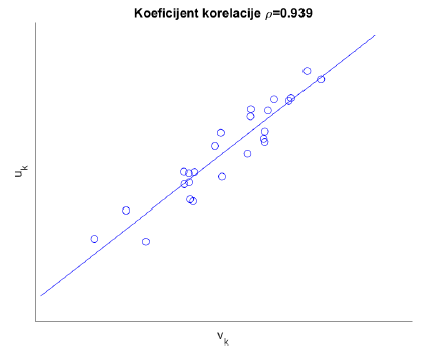  
</div>

<div>
   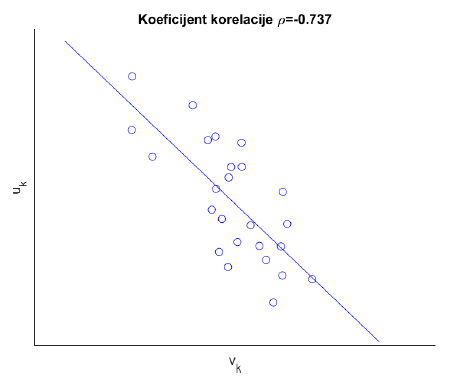  
</div>

<div>
   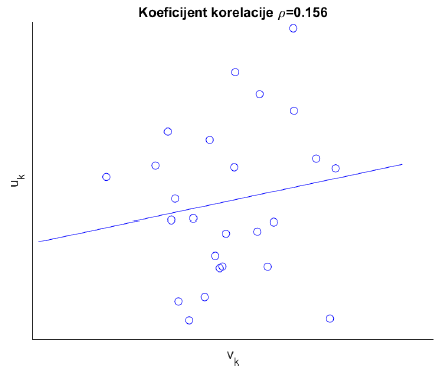  
</div>

**Zadatak 5.** Neka je skup podataka $$(x,y)\in\{(a_i,b_i)\ |\ i=1,2,\dots,n\},$$ modelovan linearnom funkcijom $y=kx+p.$ Označimo sa $\widehat{k}$ i $\widehat{p}$ koeficijente linearne regresije datog skupa podataka, i $\mathbb{1}=\begin{bmatrix}1&\dots&1\end{bmatrix}^T$. Izraziti normu rezidualnog vektora $r=b-(\widehat{k}a+\widehat{p}\mathbb{1})$ modela linearne regresije koristeći $\mu,\sigma$ i $\rho.$

**Rešenje :** 

Kako su regresioni koeficijenti 
$$\widehat{k}=\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)},\qquad
\widehat{p}=\mu(b)-\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}\mu(a),$$
to je rezidualni vektor
\begin{align}
  r&=b-(\widehat{k}a+\widehat{p}\mathbb{1})
  =b-\left(\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}(a-\mu(a)\mathbb{1})+\mu(b)\mathbb{1}\right)\\
  &=\overline{b}-\rho(a,b)\dfrac{\sigma(b)}{\sigma(a)}\overline{a}
  =\sigma(b)\left(\widetilde{b}-\rho(a,b)\widetilde{a}\right).
\end{align}

Tada je
\begin{align}
    \|r\|^2&=r^Tr=\sigma(b)^2\left(\widetilde{b}-\rho(a,b)\widetilde{a}\right)^T\left(\widetilde{b}-\rho(a,b)\widetilde{a}\right)\\    &=\sigma(b)^2\left(\widetilde{b}^T\widetilde{b}-2\rho(a,b)\widetilde{b}^T\widetilde{a}+\rho(a,b)^2\widetilde{a}^T\widetilde{a}\right)\\
    &=\sigma(b)^2\left(\|\widetilde{b}\|^2-2\rho(a,b)\widetilde{b}^T\widetilde{a}+\rho(a,b)^2\|\widetilde{a}\|^2\right)\\
    &=\sigma(b)^2\left(n-2n\rho(a,b)^2+n\rho(a,b)^2\right)\\
    &=n\sigma(b)^2\left(1-\rho(a,b)^2\right)
\end{align}
Tada je prosečna greška po komponentama jednaka $\|r\|_{sr}.$ Dobijene rezultate prikazaćemo grafički na slučajno generisanim parovima vektora.

<div>
   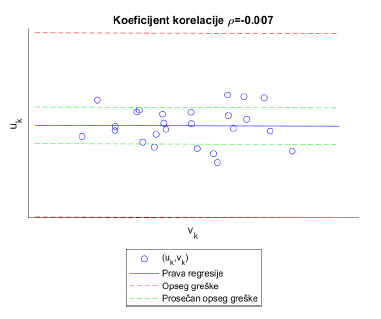  
</div>


<div>
   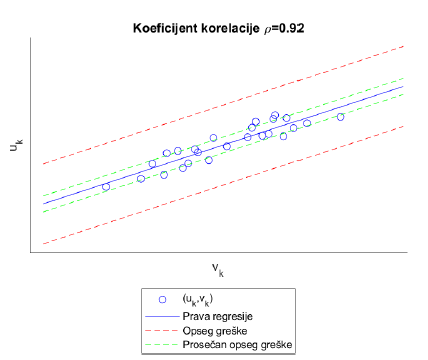  
</div>


<div>
   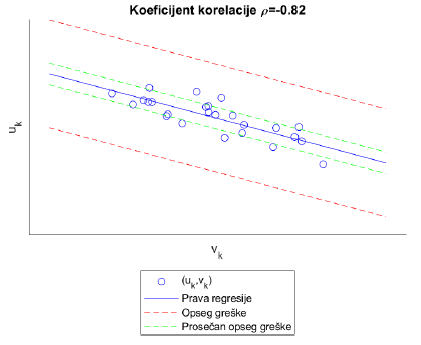  
</div>

**Zadatak 6.** Tabelom i slikom predstavljen je broj tranzistora u Intelovim procesorima u vreme njihovog uvođenja na tržište, izvor [Business News Daily](https://www.businessnewsdaily.com/10817-slideshow-intel-processors-over-the-years.html) i [Wikipedia](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors).



\begin{array}{l|c|l|c|l|c|l|c|l|c}
    god. & br.trn.& god. & br.trn.&god. & br.trn.& god. & br.trn.& god. & br.trn. \\ \hline\hline
     1971.& 2.3\cdot10^3 &1993.& 3.1\cdot10^6 & 2004.& 112\cdot10^6 & 2008.& 1.9\cdot10^9 & 2014.&1.4\cdot10^9 \\
     1972.& 3.5\cdot10^3 & 1995.& 5.5\cdot10^6 & 2004.& 592\cdot10^6 & 2010.& 1.17\cdot10^9 & 2014.& 2.6\cdot10^9 \\
     1974.& 4.5\cdot10^3 & 1997.& 7.5\cdot10^6 & 2005.& 169\cdot10^6 & 2010.& 2\cdot10^9 & 2014.& 4.31\cdot10^9 \\
     1978.& 29\cdot10^3 & 1998.& 7.5\cdot10^6 & 2005.& 228\cdot10^6 & 2010.& 2.3\cdot10^9 & 2014.& 5.56\cdot10^9 \\
     1982.& 55\cdot10^3 & 1999.& 9.5\cdot10^6 & 2006.& 184\cdot10^6 & 2011.& 1.16\cdot10^9 & 2015.& 1.75\cdot10^9 \\
     1982.& 134\cdot10^3 & 1999.& 27.4\cdot10^6 & 2006.& 362\cdot10^6 & 2011.& 2.27\cdot10^9 & 2015.& 1.9\cdot10^9 \\
     1985.& 275\cdot10^3 & 2000.& 21\cdot10^6 & 2006.& 291\cdot10^6 & 2011.& 2.6\cdot10^9 & 2016.& 3.2\cdot10^9 \\
     1988.& 250\cdot10^3 & 2000.& 42\cdot10^6 & 2006.& 1.7\cdot10^9 & 2012.& 0.43\cdot10^9 & 2016.& 7.2\cdot10^9 \\
     1989.& 600\cdot10^3 & 2001.& 45\cdot10^6 & 2007.& 169\cdot10^6 & 2012.& 1.4\cdot10^9 & 2016.& 8\cdot10^9 \\
     1989.& 1\cdot10^6 & 2002.& 55\cdot10^6 & 2008.& 230\cdot10^6 & 2012.& 3.1\cdot10^9 & 2017.& 8\cdot10^9 \\
     1989.& 1.18\cdot10^6 & 2002.& 220\cdot10^6 & 2008.& 731\cdot10^6 & 2012.& 5\cdot10^9 &&\\
     1992.& 0.9\cdot10^6 & 2003.& 410\cdot10^6 & 2008.& 47\cdot10^6 & 2013.& 1.86\cdot10^9 &&\\ \hline
\end{array}

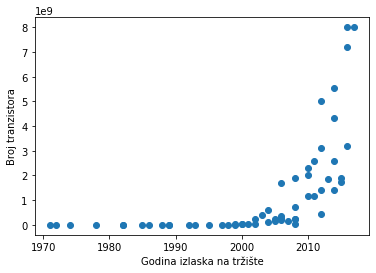

In [40]:
tabela=np.array([[1971,2.3e3],[1972,3.5e3],[1974,4.5e3],[1978,29e3],[1982,55e3],[1982,134e3],
                [1985,275e3],[1988,250e3],[1989,600e3],[1989,1e6],[1986,1.18e6],[1992,0.9e6],[1993,3.1e6],
                [1995,5.5e6],[1997,7.5e6],[1998,7.5e6],[1999,9.5e6],[1999,27.4e6],[2000,21e6],[2000,42e6],
                [2001,45e6],[2002,55e6],[2002,220e6],[2003,410e6],[2004,112e6],[2004,592e6],[2005,169e6],
                [2005,228e6],[2006,184e6],[2006,362e6],[2006,291e6],[2006,1.7e9],[2007,169e6],[2008,230e6],
                [2008,230e6],[2008,731e6],[2008,47e6],[2008,1.9e9],[2010,1.17e9],[2010,2e9],[2010,2.3e9],
                [2011,1.16e9],[2011,2.6e9],[2012,0.43e9],[2012,1.4e9],[2012,3.1e9],[2012,5e9],[2013,1.86e9],
                [2014,1.4e9],[2014,2.6e9],[2014,4.31e9],[2014,5.56e9],[2015,1.75e9],[2015,1.9e9],[2016,3.2e9],
                [2016,7.2e9],[2016,8e9],[2017,8e9]])
plt.scatter(tabela[:,0],tabela[:,1])
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("Broj tranzistora");

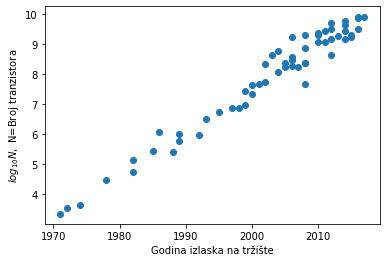

In [41]:
plt.scatter(tabela[:,0],np.log10(tabela[:,1]))
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("$log_{10}N,$ N=Broj tranzistora");

Na osnovu tabele od $58$ podataka odrediti parametre $k$ i $p$ kojima se opisuje [Murov zakon](https://en.wikipedia.org/wiki/Moore%27s_law) broja tranzistora procesora u funkciji od vremena
$$\log_{10}N\approx k(t-1971)+p.$$

**Rešenje :** 

Za datu tabelu podataka izračunavamo:
\begin{align}
    &\mu(a)=\mu({\rm godina}-1971)=31.34,
    &&\sigma(a)=\sigma({\rm godina}-1971)=11.96,\\
    &\mu(b)=\mu(\log_{10}N)=7.84,
     &&\sigma(b)=\sigma(\log_{10}N)=1.74,\\
     &\widehat{k}=\dfrac{1}{\sigma(a)^2}\left(\dfrac{a^Tb}{58}-\mu(a)\mu(b)\right)=0.14,
     &&\widehat{p}=3.37
\end{align}

In [42]:
n,_=tabela.shape
print(n)

58


In [43]:
a=tabela[:,0]-1971
ma=np.mean(a)
print(np.round(ma,2))

31.24


In [44]:
sa=np.linalg.norm(a-ma)/np.sqrt(n)
print(np.round(sa,2))

11.96


In [45]:
b=np.log10(tabela[:,1])
mb=np.mean(b)
print(np.round(mb,2))

7.84


In [46]:
sb=np.linalg.norm(b-mb)/np.sqrt(n)
print(np.round(sb,2))

1.74


In [47]:
k=(np.dot(a,b)/n-ma*mb)/(sa**2)
print(np.round(k,2))
p=mb-k*ma
print(np.round(p,2))

0.14
3.37


Na osnovu Intelovih podataka, Murov zakon dobija oblik
$$\log_{10}N\approx 0.14(t-1971)+3.33.$$
Grafički prikaz dobijenog rešenja linearne regresije dat je narednom slikom.

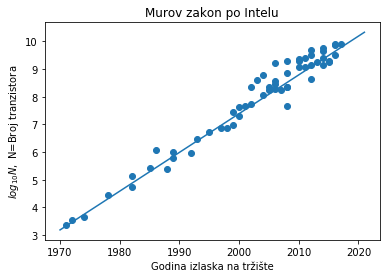

In [48]:
y=0.14*(np.array([1970,2021])-1971)+3.33
plt.plot([1970,2021],y)
plt.scatter(tabela[:,0],np.log10(tabela[:,1]))
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("$log_{10}N,$ N=Broj tranzistora")
plt.title('Murov zakon po Intelu');

Dobijeni model $$\log_{10}N\approx 0.14(t-1971)+3.33$$ predviđa da će Intel godine $2030.$ na tržište da izbaci procesor sa $10^{11.59}$ tranzistora.

In [49]:
0.14*(2030-1971)+3.33

11.590000000000002